In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
sns.set(color_codes=True)
%matplotlib inline

## Loading and Reviewing the Data

In [37]:
data_frame = pd.read_csv("stroke_prediction_dataset.csv")

In [35]:
data_frame.shape

(9334, 16)

In [36]:
data_frame.head(8)

,Age,Gender,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Previous Heart Disease,Family Stroke History,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Diag0sis
0,73,1,0,0,185.29,27.50,0,3,1,0,0,3,5.35,174/81,"HDL: 70, LDL: 137",0
1,40,0,1,0,77.83,28.20,2,0,0,1,0,6,6.38,178/105,"HDL: 31, LDL: 134",0
2,82,1,0,0,111.23,28.83,2,1,2,1,1,0,8.39,119/88,"HDL: 32, LDL: 88",0
3,41,1,0,1,94.90,36.74,1,3,0,1,1,4,1.56,91/80,"HDL: 32, LDL: 114",0
4,80,0,0,0,136.06,25.19,1,0,2,1,0,1,4.14,97/81,"HDL: 40, LDL: 141",0
5,31,0,1,1,64.91,16.90,1,3,2,0,0,6,3.26,175/84,"HDL: 30, LDL: 154",0
6,63,0,1,1,88.43,32.45,2,1,2,1,0,0,8.29,103/86,"HDL: 56, LDL: 82",0
7,40,0,1,1,171.67,18.12,1,2,0,1,0,6,9.70,98/106,"HDL: 41, LDL: 114",0


In [ ]:
data_frame.tail(5)

,Age,Sex,Blood Pressure Truong,Blood Pressure Thu,Blood Pressure,Heart Rate,Family History,Smoking,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
8758,60,0,94,76,94/76,61,1,1,1,7.917342,1,1,1,8,10.806373,19.655895,7,7,0
8759,28,1,157,102,157/102,73,0,0,0,16.558426,1,0,0,8,3.833038,23.993866,4,9,0
8760,47,0,161,75,161/75,105,1,1,1,3.148438,0,1,0,5,2.375214,35.406146,4,4,1
8761,36,0,119,67,119/67,60,0,1,0,3.789950,-1,1,1,5,0.029104,27.294020,2,8,0
8762,25,1,138,67,138/67,75,1,0,1,18.081748,1,0,0,8,9.005234,32.914151,7,4,1


## Check for null values

In [ ]:
print (data_frame.isnull().values.any())

False


### Correlated Feature Check

Helper function that displays correlation by color.  Red is most correlated, Blue least.

In [16]:
def plot_corr(data_frame, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        data_frame: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = data_frame.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


In [ ]:
data_frame.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


In [ ]:
data_frame.head(7)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0
5,20.0,0,0,27.32,6.6,85,0
6,44.0,0,0,19.31,6.5,200,1


The skin and thickness columns are correlated 1 to 1.  Dropping the skin column

In [ ]:
data_frame.head(7)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0
5,20.0,0,0,27.32,6.6,85,0
6,44.0,0,0,19.31,6.5,200,1


Check for additional correlations

In [8]:
plot_corr(data_frame)

ValueError: could not convert string to float: '174/81'

## Mold Data

### Data Types

Inspect data types to see if there are any issues.  Data should be numeric.

In [ ]:
data_frame.head(7)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0
5,20.0,0,0,27.32,6.6,85,0
6,44.0,0,0,19.31,6.5,200,1


Change diabetes from boolean to integer, True=1, False=0

Verify that the diabetes data type has been changed.

In [5]:
data_frame = data_frame.drop('Blood Pressure Levels', axis = 1)
data_frame = data_frame.drop('Cholesterol Levels', axis = 1)
data_frame.head(5)

,Age,Gender,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Previous Heart Disease,Family Stroke History,Dietary Habits,Stress Levels,Blood Pressure Thu,Blood Pressure Truong,HDL Cholesterol Levels,LDL Cholesterol Levels,Diag0sis
0,73,1,0,0,185.29,27.50,0,3,1,0,0,3,5.35,174,81,70,137,0
1,40,0,1,0,77.83,28.20,2,0,0,1,0,6,6.38,178,105,31,134,0
2,82,1,0,0,111.23,28.83,2,1,2,1,1,0,8.39,119,88,32,88,0
3,41,1,0,1,94.90,36.74,1,3,0,1,1,4,1.56,91,80,32,114,0
4,80,0,0,0,136.06,25.19,1,0,2,1,0,1,4.14,97,81,40,141,0


In [6]:
data_frame.tail(15)

,Age,Gender,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Previous Heart Disease,Family Stroke History,Dietary Habits,Stress Levels,Blood Pressure Thu,Blood Pressure Truong,HDL Cholesterol Levels,LDL Cholesterol Levels,Diag0sis
9319,75,1,1,1,114.77,36.80,1,3,1,0,0,1,0.23,143,72,33,95,1
9320,79,1,0,0,77.82,21.48,1,2,2,0,0,1,7.59,91,65,38,64,0
9321,71,1,0,0,143.33,21.54,0,1,1,0,1,3,7.28,110,73,58,184,0
9322,50,1,0,0,134.00,39.11,2,2,1,0,0,0,3.36,92,90,40,121,0
9323,73,0,0,0,134.92,39.41,1,1,1,0,1,2,3.54,162,97,65,163,0
9324,47,0,0,1,117.64,22.88,0,2,1,1,1,5,3.67,156,70,43,94,1
9325,26,1,0,1,145.05,35.94,0,2,0,1,0,4,0.71,180,110,33,99,0
9326,81,0,1,1,60.21,30.85,0,1,1,1,0,0,5.49,160,73,50,174,1
9327,90,0,1,0,199.79,27.16,1,1,0,1,1,2,2.11,108,61,80,162,1
9328,79,0,0,1,82.69,36.82,2,3,0,1,1,6,8.69,100,99,60,65,0


### Check for null values

In [ ]:
data_frame.isnull().values.any()

False

No obvious null values.

### Check class distribution

Rare events are hard to predict

In [13]:
num_obs = len(data_frame)
num_true = len(data_frame.loc[data_frame['Diag0sis'] == 1])
num_false = len(data_frame.loc[data_frame['Diag0sis'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))

Number of True cases:  1802 (19.31%)
Number of False cases: 7532 (80.69%)


Good distribution of true and false cases.  No special work needed.

### Spliting the data

70% for training, 30% for testing

In [28]:
from sklearn.model_selection import train_test_split

feature_col_names = ['Age', 'Gender', 'Hypertension', 'Heart Disease',
                     'Body Mass Index (BMI)', 'Smoking Status', 'Alcohol Intake', 'Physical Activity', 'Previous Heart Disease', 'Family Stroke History',
                     'Dietary Habits', 'HDL Cholesterol Levels', 'LDL Cholesterol Levels', 'Stress Levels', 'Blood Pressure Thu', 'Blood Pressure Truong']
predicted_class_names = ['Diag0sis']

X = data_frame[feature_col_names].values     # predictor feature columns (8 X m)
y = data_frame[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.3

#Splitting Data from 2 different Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)
                            # test_size = 0.3 is 30%, 42 is the answer to everything

We check to ensure we have the the desired 70% train, 30% test split of the data

In [ ]:
trainval = (1.0 * len(X_train)) / (1.0 * len(data_frame.index))
testval = (1.0 * len(X_test)) / (1.0 * len(data_frame.index))
print("{0:0.2f}% in training set".format(trainval * 100))
print("{0:0.2f}% in test set".format(testval * 100))

70.00% in training set
30.00% in test set


#### Verifying predicted value was split correctly

In [15]:
print("Original True  : {0} ({1:0.2f}%)".format(len(data_frame.loc[data_frame['Diag0sis'] == 1]), (len(data_frame.loc[data_frame['Diag0sis'] == 1])/len(data_frame.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(data_frame.loc[data_frame['Diag0sis'] == 0]), (len(data_frame.loc[data_frame['Diag0sis'] == 0])/len(data_frame.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))


Original True  : 1802 (19.31%)
Original False : 7532 (80.69%)

Training True  : 1278 (19.56%)
Training False : 5255 (80.44%)

Test True      : 524 (18.71%)
Test False     : 2277 (81.29%)


### Post-split Data Preparation

#### Hidden Missing Values

Are these 0 values possible?

How many rows have have unexpected 0 values?

In [ ]:
print("# rows in dataframe {0}".format(len(data_frame)))
print("# rows missing age: {0}".format(len(data_frame.loc[data_frame['age'] == 0])))
print("# rows missing hypertension: {0}".format(len(data_frame.loc[data_frame['hypertension'].isnull()])))
print("# rows missing heart_disease: {0}".format(len(data_frame.loc[data_frame['heart_disease'].isnull()])))
print("# rows missing bmi: {0}".format(len(data_frame.loc[data_frame['bmi'] == 0])))
print("# rows missing HbA1c_level: {0}".format(len(data_frame.loc[data_frame['HbA1c_level'] == 0])))
print("# rows missing blood_glucose_level: {0}".format(len(data_frame.loc[data_frame['blood_glucose_level'] == 0])))

# rows in dataframe 100000
# rows missing age: 0
# rows missing hypertension: 0
# rows missing heart_disease: 0
# rows missing bmi: 0
# rows missing HbA1c_level: 0
# rows missing blood_glucose_level: 0


## Training Initial Algorithm - Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB

# create Multinomial Naive Bayes model object and train it with the data
nb_model = MultinomialNB()

nb_model.fit(X_train, y_train.ravel())

filename = 'HeartAttackPredictionFinalizedModel.sav'

pickle.dump(nb_model, open(filename, 'wb'))

GaussianNB()

## Performance on Training Data


In [13]:
# this returns array of predicted results
prediction_from_trained_data_Multi = nb_model_Multi.predict(X_train)
# prediction_from_trained_data_Gause = nb_model_Gaus.predict(X_train)

In [15]:
from sklearn import metrics

accuracyMulti = metrics.accuracy_score(y_train, prediction_from_trained_data_Multi)
# accuracyGaus = metrics.accuracy_score(y_train, prediction_from_trained_data_Gause)

print ("Accuracy of our Multinomial naive bayes model is : {0:.4f}".format(accuracyMulti))

# print ("Accuracy of our Gausian naive bayes model is : {0:.4f}".format(accuracyGaus))

Accuracy of our Multinomial naive bayes model is : 0.8044
Accuracy of our Gausian naive bayes model is : 0.8044


## Performance on Testing Data

In [16]:
from sklearn import metrics
# this returns array of predicted results
prediction_from_test_data_Multi = nb_model_Multi.predict(X_test)
prediction_from_test_data_Gause = nb_model_Gaus.predict(X_test)

accuracyMulti = metrics.accuracy_score(y_test, prediction_from_test_data_Multi)
accuracyGaus = metrics.accuracy_score(y_test, prediction_from_test_data_Gause)

print ("Accuracy of our Multinomial naive bayes model is : {0:.4f}".format(accuracyMulti))

print ("Accuracy of our Gausian naive bayes model is : {0:.4f}".format(accuracyGaus))

Accuracy of our Multinomial naive bayes model is : 0.8129
Accuracy of our Gausian naive bayes model is : 0.8129


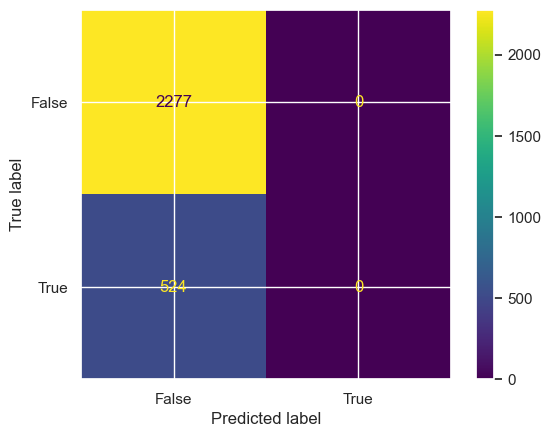

In [27]:
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test, prediction_from_test_data_Multi)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [18]:
print ("Classification Report")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, prediction_from_test_data, labels=[1, 0])))

Classification Report


NameError: name 'prediction_from_test_data' is not defined

# Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=42)

# Predict Training Data

In [ ]:
rf_predict_train = rf_model.predict(X_train)

#get accuracy
rf_accuracy = metrics.accuracy_score(y_train, rf_predict_train)

#print accuracy
print ("Accuracy: {0:.4f}".format(rf_accuracy))

Accuracy: 1.0000


# Predict Testing Data

In [20]:
rf_predict_test = rf_model.predict(X_test)

#get accuracy
rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(rf_accuracy_testdata))

Accuracy: 0.8129


In [21]:
print ("Confusion Matrix for Random Forest")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, rf_predict_test, labels=[1, 0])))

Confusion Matrix for Random Forest
[[   0  524]
 [   0 2277]]

Classification Report

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       524
           0       0.81      1.00      0.90      2277

    accuracy                           0.81      2801
   macro avg       0.41      0.50      0.45      2801
weighted avg       0.66      0.81      0.73      2801



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")

# set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())

lr_cv_predict_test = lr_cv_model.predict(X_test)

lr_accuracy_test_data = metrics.accuracy_score(y_test, lr_cv_predict_test)

# training metrics
print( "Accuracy: {0:.4f}".format(lr_accuracy_test_data))
print (metrics.confusion_matrix(y_test, lr_cv_predict_test, labels=[1, 0]))
print ("")
print ("Classification Report")
print (metrics.classification_report(y_test, lr_cv_predict_test, labels=[1,0]))

Accuracy: 0.5187
[[ 257  267]
 [1081 1196]]

Classification Report
              precision    recall  f1-score   support

           1       0.19      0.49      0.28       524
           0       0.82      0.53      0.64      2277

    accuracy                           0.52      2801
   macro avg       0.50      0.51      0.46      2801
weighted avg       0.70      0.52      0.57      2801



# Support vector Machine

In [23]:
from sklearn.svm import SVC
# Create a RandomForestClassifier object
svm_model = SVC(kernel='linear', C=1, random_state=42)

svm_model.fit(X_train, y_train.ravel())


SVC(C=1, kernel='linear', random_state=42)

In [ ]:
# this returns array of predicted results
prediction_from_trained_data = svm_model.predict(X_train)

In [ ]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our SVM model is : {0:.4f}".format(accuracy))

Accuracy of our SVM model is : 0.6412


In [24]:
svm_predict_test = svm_model.predict(X_test)

#get accuracy
svm_accuracy_testdata = metrics.accuracy_score(y_test, svm_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(svm_accuracy_testdata))

Accuracy: 0.8129


In [ ]:
print ("Confusion Matrix for Support Vector Amchine")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, svm_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, svm_predict_test, labels=[1, 0])))

Confusion Matrix for Support Vector Amchine
[[   0  938]
 [   0 1691]]

Classification Report

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       938
           0       0.64      1.00      0.78      1691

    accuracy                           0.64      2629
   macro avg       0.32      0.50      0.39      2629
weighted avg       0.41      0.64      0.50      2629



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,round(y[i], 3), round(y[i],3), ha = 'center')

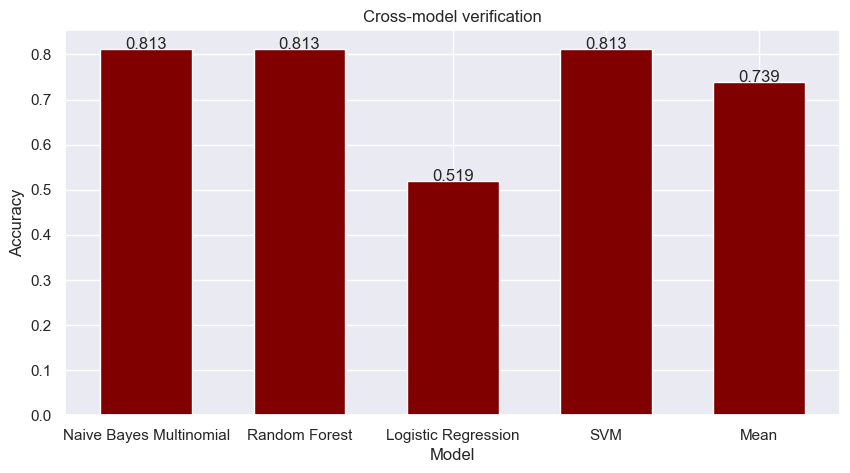

In [26]:
import numpy as np
import matplotlib.pyplot as plt

Mean_accuracy = (accuracyMulti + rf_accuracy_testdata + svm_accuracy_testdata + lr_accuracy_test_data)/4

data = {'Naive Bayes Multinomial': accuracyMulti, 'Random Forest':rf_accuracy_testdata, 'Logistic Regression': lr_accuracy_test_data, 'SVM':svm_accuracy_testdata, 'Mean': Mean_accuracy}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.6)

addlabels(courses, values)

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Cross-model verification")
plt.show()


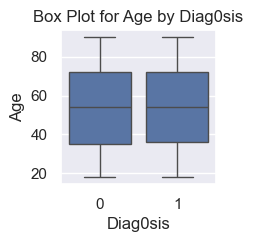

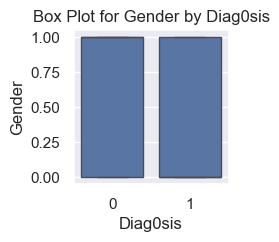

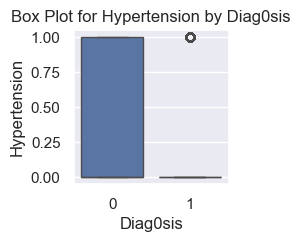

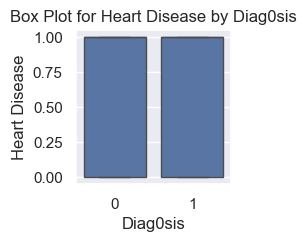

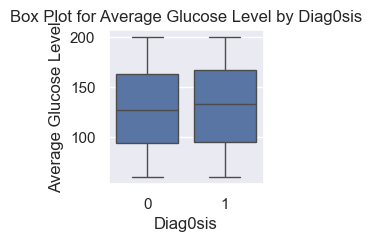

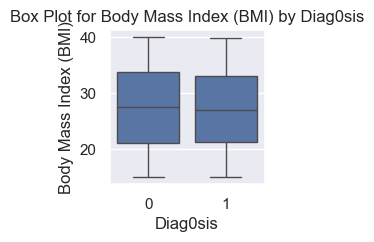

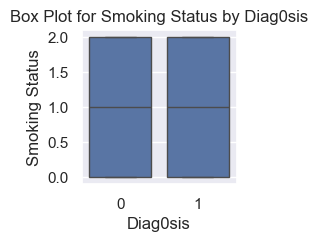

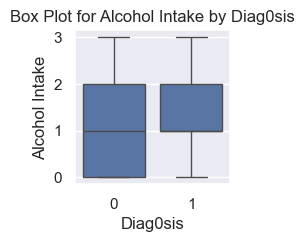

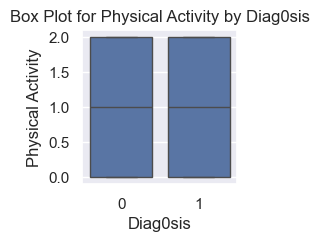

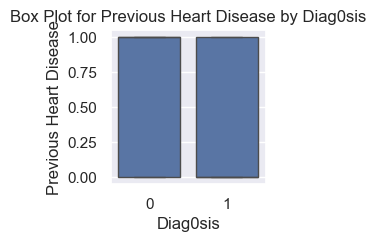

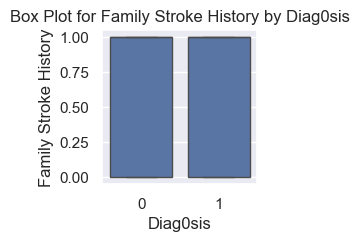

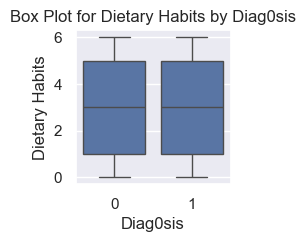

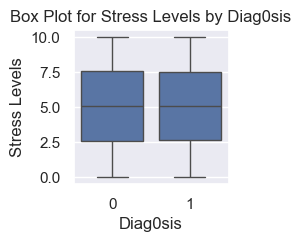

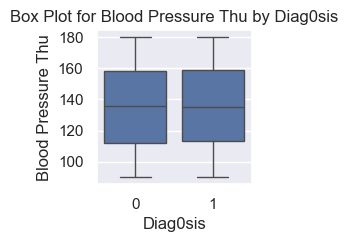

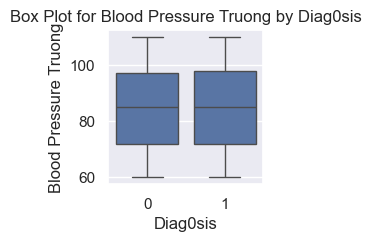

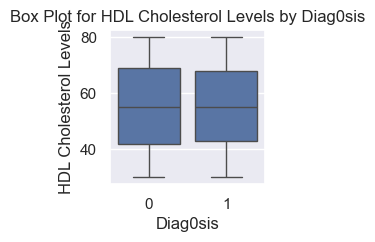

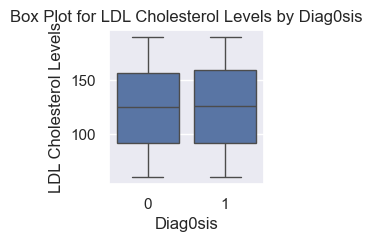

In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

num_col=[col for col in data_frame.columns if data_frame[col].dtype!='O' and col!='Diag0sis']
cat_col=[col for col in data_frame.columns if data_frame[col].dtype=='O']

df_num=data_frame[num_col+['Diag0sis']]

for col in num_col:
    plt.figure(figsize=(2, 2))
    sns.boxplot(x=data_frame['Diag0sis'], y=data_frame[col])
    plt.title(f'Box Plot for {col} by Diag0sis')
    plt.show()

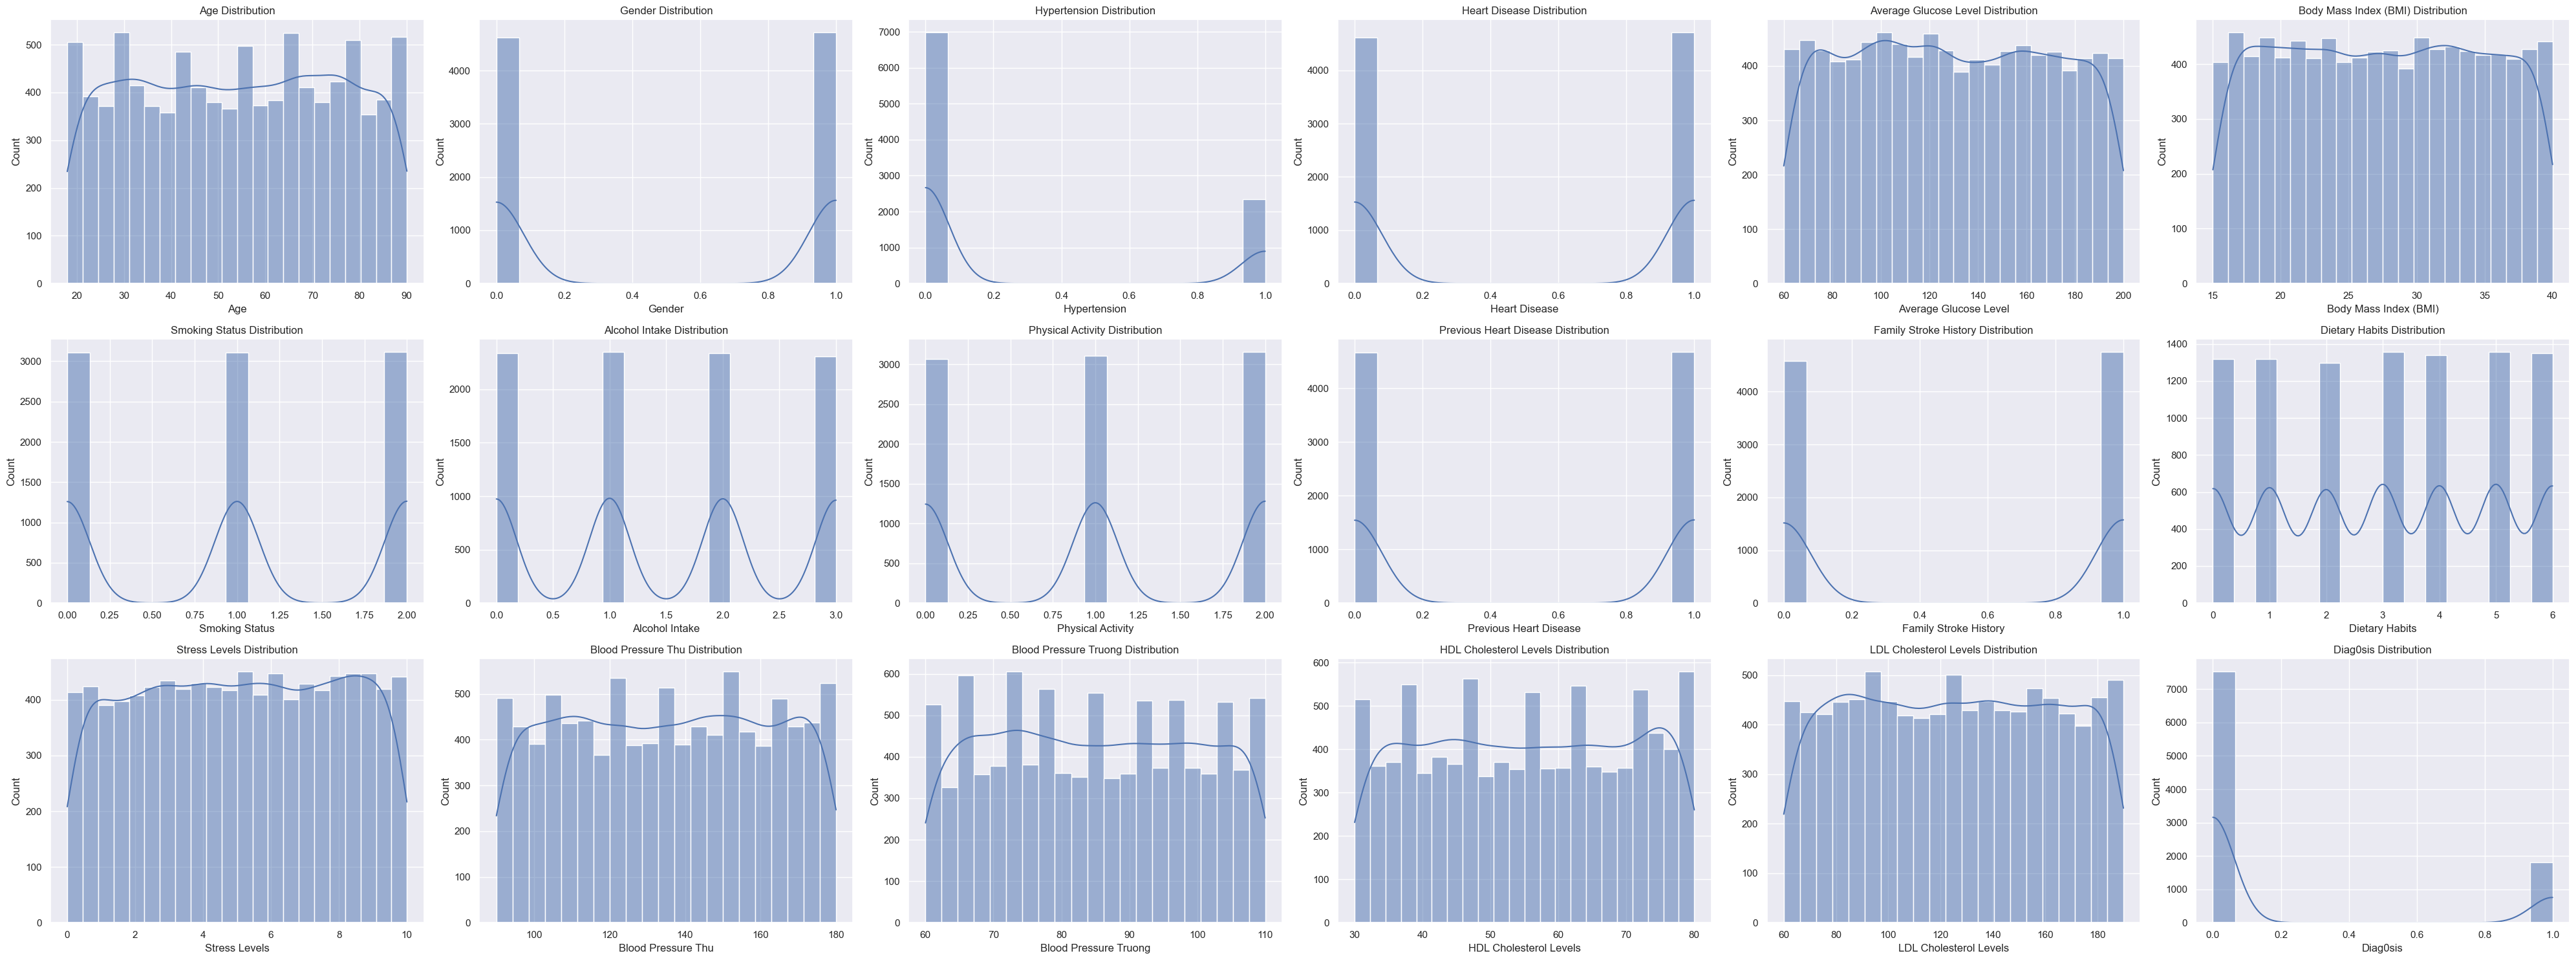

In [52]:
df_num_nonbin=[col for col in df_num.columns if df_num[col].nunique()!=2]
fig, axes = plt.subplots(3, 6, figsize=(40, 15))
axes = axes.flatten()
for i,col in enumerate(df_num.columns):
    sns.histplot(df_num[col], kde=True, ax=axes[i])
    axes[i].set_title(f"{col} Distribution")
plt.tight_layout()
plt.show()

31.91800878477306
34.626647144948755
33.45534407027818


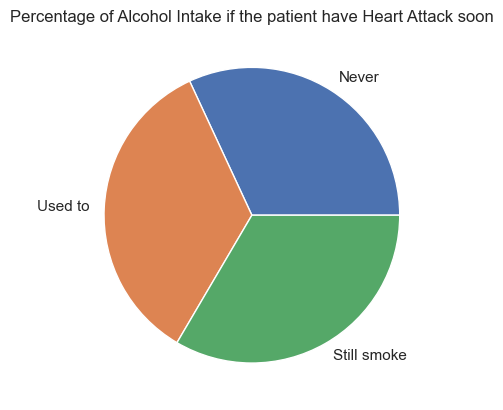

In [60]:
row_count_zero = len(data_frame[(data_frame["Alcohol Intake"] == 0) & (data_frame["Diag0sis"] == 1)])
row_count_one = len(data_frame[(data_frame["Alcohol Intake"] == 1) & (data_frame["Diag0sis"] == 1)])
row_count_two = len(data_frame[(data_frame["Alcohol Intake"] == 2) & (data_frame["Diag0sis"] == 1)])
row_count_total = row_count_zero + row_count_one + row_count_two
pct_zero = (row_count_zero/row_count_total)*100
pct_one = (row_count_one/row_count_total)*100
pct_two = 100 - pct_zero - pct_one
print(pct_zero) 
print(pct_one) 
print(pct_two) 

y = np.array([pct_zero, pct_one, pct_two])
mylabels = ["Never", "Used to", "Still smoke"]
# myexplode = [0.2, 0.0, 0.0]


plt.pie(y, labels = mylabels)
plt.title("Percentage of Alcohol Intake if the patient have Heart Attack soon")
plt.show() 